### Subplots, Text and Annotations
As seen from the previous example of plotting histogram of an RGB image, sometimes it is helpful to visualize different data/ views of same data together. Matplotlib has the concept of subplots that we have been using (without even knowing about it) since Intro to Matplotlib to create `figure` and `axes` object.

The concept of subplots revolve around the argument that, while an `Axes` object can only belong to one `Figure` (and it **MUST**), a `Figure` can have many `Axes` objects. These axes are typically called *subplots*. They act just like regular `Axes`.

Lets look at a simple example:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import pandas as pd

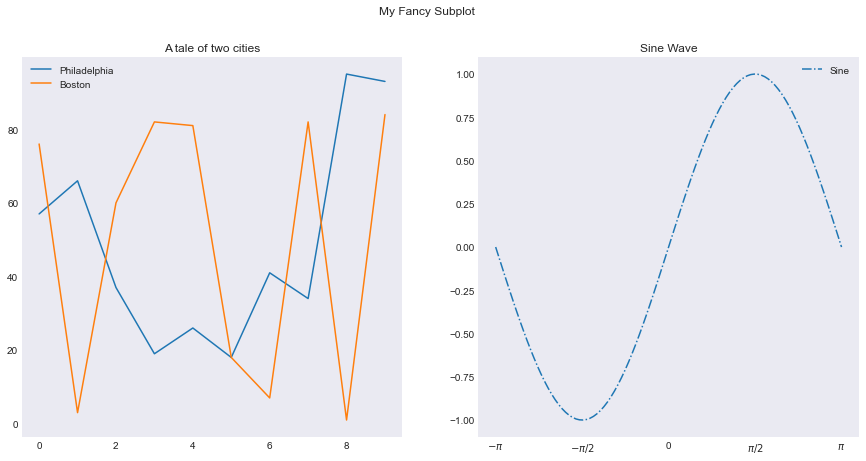

In [2]:
# 1 row and 2 column figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
# when subplot has more than one row or column, the second argument
# returned by `plt.subplots` is a tuple.

# two axes objects
ax1 = axes[0]
ax2 = axes[1]

# plot on first axes object (aka first subplot at posn row=1, column=1)
ax1.plot(np.arange(10), np.random.randint(1, 99, size=10), label='Philadelphia')
ax1.plot(np.arange(10), np.random.randint(1, 99, size=10), label='Boston')
ax1.set_title('A tale of two cities')
ax1.grid(which='major')
ax1.legend()

# plot on second axes object (aka subplot at posn row=1, column=2)
theta = np.linspace(-np.pi, np.pi, 100)
ax2.plot(theta, np.sin(theta), ls='-.', label='Sine')
ax2.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax2.set_xticklabels(['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
ax2.set_title("Sine Wave")
ax2.grid(which='major')
ax2.legend()

# Add a centered title for the whole figure
fig.suptitle('My Fancy Subplot')
plt.show()

And voila! You will have created your first subplot! 

#### Spacing
The spacing between the subplots can be adjusted using [`plt.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). 

Play around with the example below--change the numbers and run the cell--to see how the different arguments affect the spacing. 

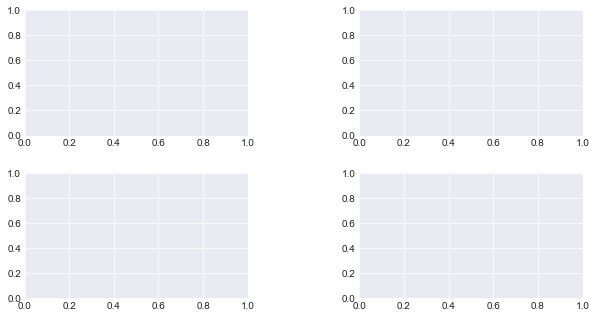

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)

A common complaint with matplotlib users is that the labels do not fit with the subplots, or the label of one subplot spills onto another subplot's area. If you look at the example below, you’ll see the “x points” label between the upper and lower plots is cut off... 

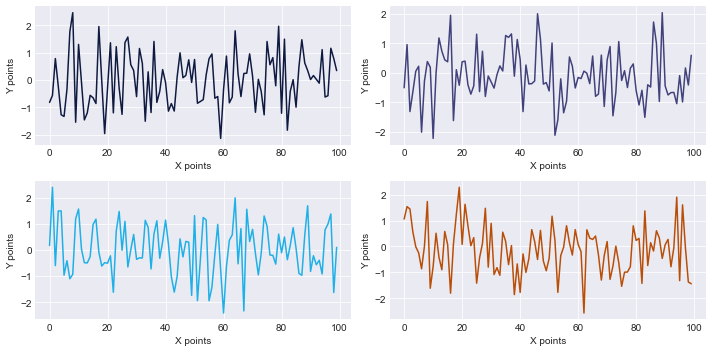

In [4]:
def example_plot(ax):
    ax.plot(np.random.randn(100), color=np.random.rand(3))
    ax.set_xlabel('X points', fontsize=10)
    ax.set_ylabel('Y points', fontsize=10)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
# try commenting the below line and see the difference
plt.tight_layout()

Notice how the colors are randomly generated. It is not always the best practice, but good enough for most beginner situations. In the future you can create your own list of colors and run them so that each subplot appears as a different color (at least until the cycle restarts).  You can find an example in the Miscellaneous plots module)



#### Sharing axes
There will be times when you want to have the x axis and/or the y axis of your subplots be "shared.” (like x-axis in the above subplots) Sharing an axis means that the axis in one or more subplots will be tied together such that any change in one of the axis changes all of the other shared axes. This works very nicely with autoscaling arbitrary datasets that may have overlapping domains, as in the plot above. 

Furthermore, when interacting with the plots (panning and zooming), all of the shared axes will pan and zoom automatically.

Setting the “sharex” line to “True” will share the x axis between the subplots (see below)

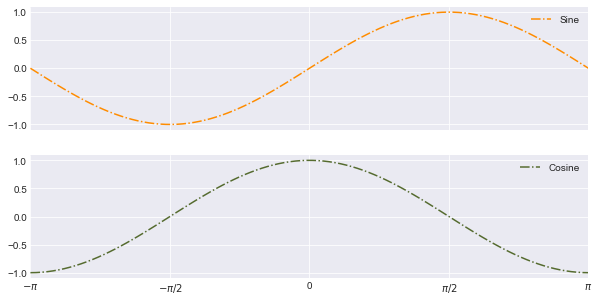

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))
theta = np.linspace(-np.pi, np.pi, 100)

# Sine plot
ax1.plot(theta, np.sin(theta), ls='-.', label='Sine', color='darkorange')
ax1.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax1.set_xticklabels(['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
ax1.legend()

ax1.set_xlim(-np.pi, np.pi)

# Cosine plot
ax2.plot(theta, np.cos(theta), ls='-.', label='Cosine', color='darkolivegreen')
ax2.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax2.set_xticklabels(['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
ax2.legend()

#### GridSpec
Under the hood, matplotlib utilizes [`GridSpec`](http://matplotlib.org/api/gridspec_api.html) to lay out the subplots. While `plt.subplots()` is fine for simple cases, sometimes (as when you want to create subplots of different sizes, which you’ll see below) you will need more advanced subplot layouts. In such cases, you should use GridSpec directly. GridSpec is outside the scope of this tutorial, but it is handy to know that it exists.  [`GridSpec Guide`](http://matplotlib.org/users/gridspec.html) is a guide on how to use it.

Lets take a look at a small example:

/Users/mohitsharma44/.pyenv/versions/3.7.4/envs/ucsl17-3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


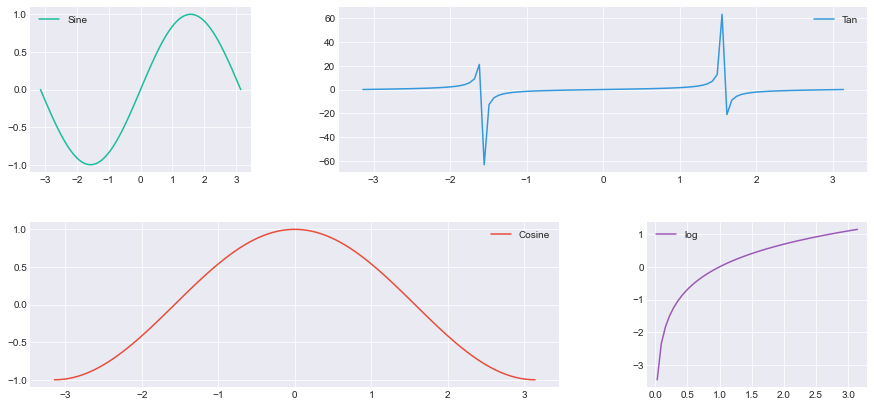

In [6]:
fig = plt.figure(figsize=(15, 7))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
ax0 = plt.subplot(grid[0, 0])
ax1 = plt.subplot(grid[0, 1:])
ax2 = plt.subplot(grid[1, :2])
ax3 = plt.subplot(grid[1, 2])

theta = np.linspace(-np.pi, np.pi, 100)

ax0.plot(theta, np.sin(theta), label='Sine', color='#1abc9c')
ax1.plot(theta, np.tan(theta), label='Tan', color='#3498db')
ax2.plot(theta, np.cos(theta), label='Cosine', color='#e74c3c')
ax3.plot(theta, np.log(theta), label='log', color='#9b59b6')

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()

You may have seen a warning when you ran the above cell. Can you think of a reason why Numpy screamed at us saying 'invalid value' when it was trying to calculate the log values for `theta`s ?"

### Text and Annotations

The plots that we have made till now are perfectly fine: they convey the information. However let’s look at something new. Let’s try loading a dataset like “311 noise complaints for the month of Nov 2016 through January 2017.” What we want here is to make sure viewers are attentive to what we want to them to notice. 

First, let's load the dataset: 

In [7]:
noise = pd.read_csv('sample_datasets/2012_NYC_Noise_Complaints.csv', 
                    parse_dates=['Created Date'])

/Users/mohitsharma44/.pyenv/versions/3.7.4/envs/ucsl17-3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


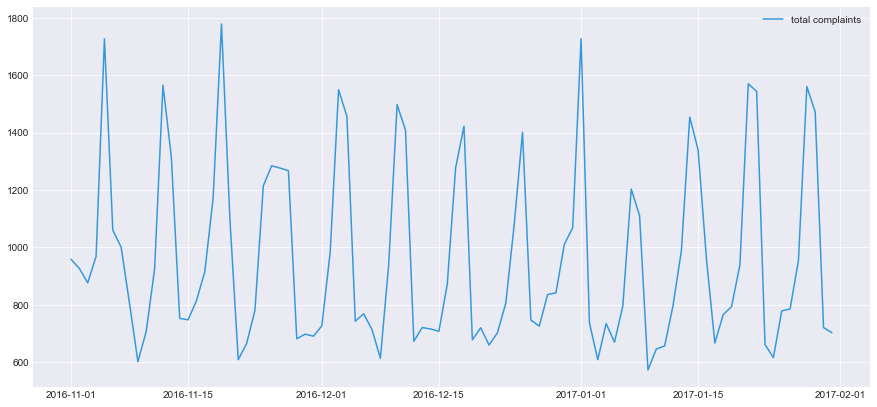

In [8]:
import matplotlib as mpl
# All the complaints aggregated by day
total_complaints = noise.groupby(by=noise['Created Date'])['Unique Key'].count()
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')
ax.legend()

For such plots, conveying information like a particular market dip or simply drawing readers’ attention requires some small textual cues and labels. Matplotlib provides two ways one can place arbitrary text anywhere they want on a plot. The first is a simple text(). Then there is the fancier annotate() function that can help point out what you want to annotate

So first, let's take a look at simple text method. The text method  takes the text and the x and y position of where you want to put the text. (Also let's clean up our x-axis a bit)


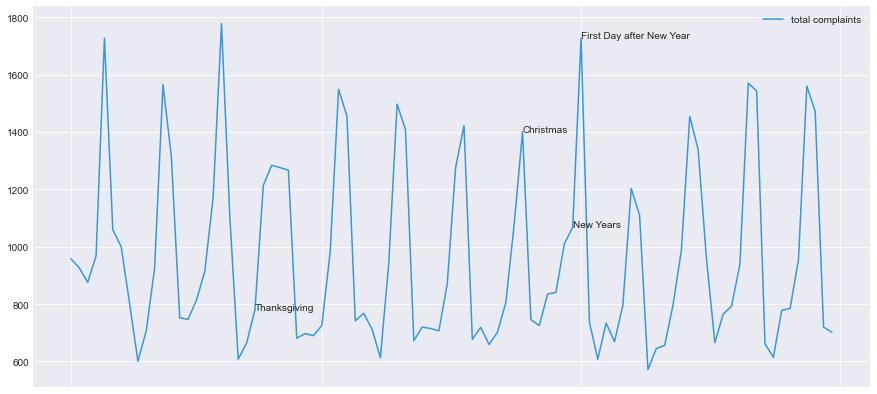

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')

# formatting the xaxis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%B'%y"));
ax.legend()

# Let point out some occassions
fav_dates={"2016-11-23":"Thanksgiving", 
          "2016-12-25": "Christmas",
          "2016-12-31": "New Years",
          "2017-01-01":   "First Day after New Year"
          }
for date in fav_dates.items():
    ax.text(date[0], total_complaints.loc[date[0]], date[1])

And now we can see there is text to help focus our reader’s attention. Hmm.. It looks like people get crabby after the New Year!

So that is the text function. While the above plot conveys the information we want it to, it can lack flexibility. For more control and additional features, we can use the annotate function. Let’s try modifying the same plot with that function.


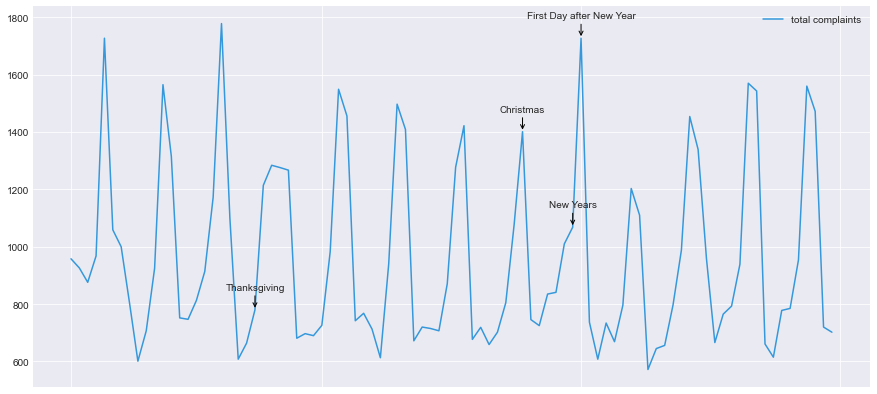

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')

# formatting the xaxis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%B'%y"));
ax.legend()

# Let point out some occassions
fav_dates={"2016-11-23":"Thanksgiving", 
          "2016-12-25": "Christmas",
          "2016-12-31": "New Years",
          "2017-01-01":   "First Day after New Year"
          }
for date in fav_dates.items():
    xposition = date[0]
    yposition = total_complaints.loc[date[0]]
    ax.annotate(date[1], xy=(xposition, yposition),
               xycoords='data', ha='center',
               xytext=(0, 20), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))

Now, as you’ll notice, there are arrows which help reinforce the reader’s focus. This sort of thing can be helpful whenever you’re dealing with a large set or sets of data, which may be presenting a viewer with more than one point of focus. 

The arrow style is controlled through the arrowprops dictionary. These options are fairly well-documented in documentation (press ? or Shift+<TAB>) so we will not repeat it. But let's take a look at just one example.

Text(0, 0.5, 'Number of Complaints')

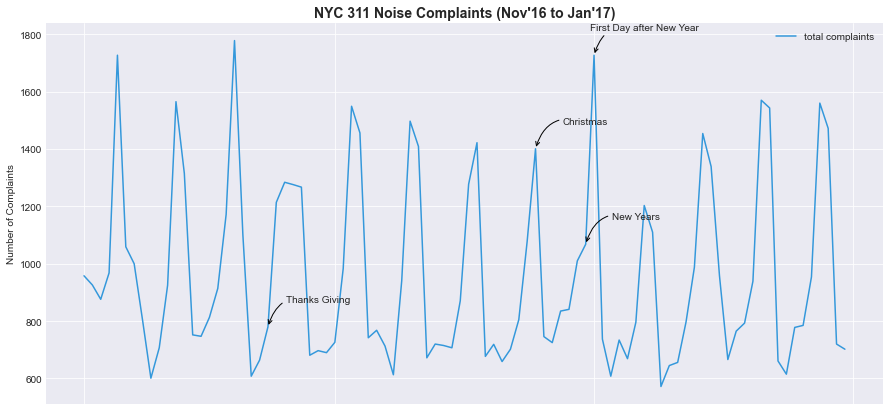

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')

# formatting the xaxis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%B'%y"));
ax.legend()

# Let point out some occassions
fav_dates={"2016-11-23":"Thanks Giving", 
          "2016-12-25": "Christmas",
          "2016-12-31": "New Years",
          "2017-01-01":   "First Day after New Year"
          }
for date in fav_dates.items():
    xposition = date[0]
    yposition = total_complaints.loc[date[0]]
    ax.annotate(date[1], xy=(xposition, yposition),
               xycoords='data', ha='center',
               xytext=(50, 25), textcoords='offset points',
               arrowprops=dict(arrowstyle="->",
                               connectionstyle="arc3,rad=0.5",))

# For sake of completion
ax.set_title("NYC 311 Noise Complaints (Nov'16 to Jan'17)", 
             fontdict=dict(fontsize=14, 
                           fontweight='bold'))
ax.set_ylabel('Number of Complaints')